# Setup

## Imports, config, etc

In [2]:
import os

import pandas as pd
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import pvlib

In [3]:
xs = np.arange(0, 100 * np.pi, .1)
ys = np.sin(xs)

<IPython.core.display.Javascript object>


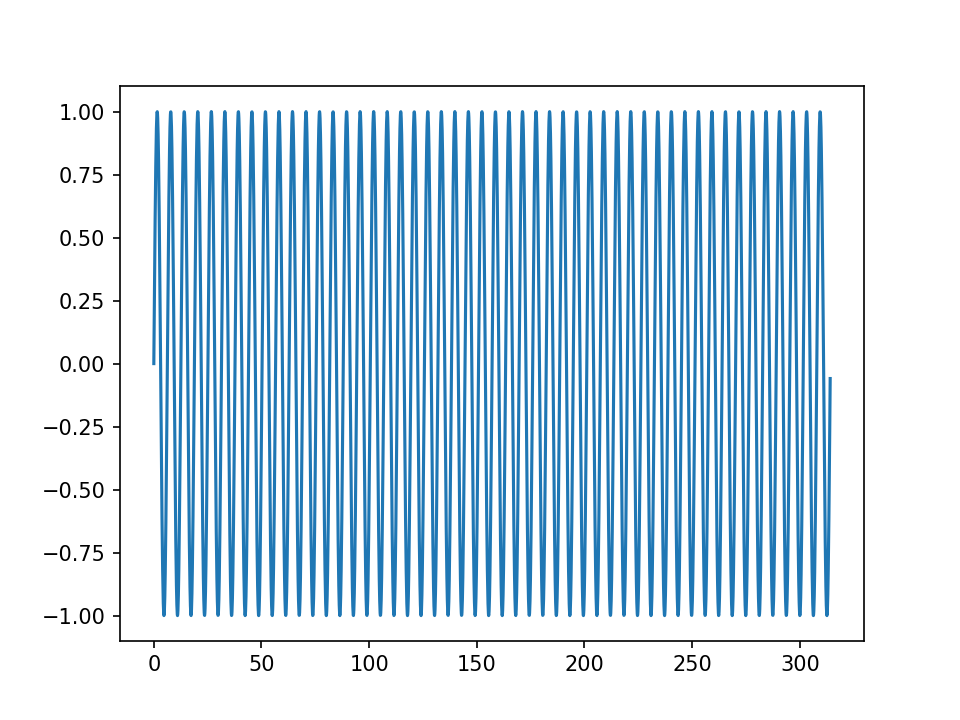

In [4]:
fig, ax = plt.subplots()

ax.plot(xs, ys)

In [5]:
def calc_window_line_length_norm(xs, ys):
    line_length = calc_window_line_length(xs, ys)
    endpoint_line_length = np.sqrt(np.square(xs[0] - xs[-1]) + np.square(ys[0] - ys[-1])) 
    line_length_norm = line_length / endpoint_line_length
    return line_length_norm

def calc_window_line_length(xs, ys):
    xdiffs = np.diff(xs)
    ydiffs = np.diff(ys)
    line_length = np.sum(np.sqrt(np.square(xdiffs) + np.square(ydiffs)))
    return line_length

In [6]:
xnew = xs[np.where(xs < 2 * np.pi)]
ynew = ys[np.where(xs < 2 * np.pi)]

In [7]:
norm_ll = []
for i in range(2, (len(xs))):
    norm_ll.append(calc_window_line_length_norm(xs[:i], ys[:i]))

<IPython.core.display.Javascript object>


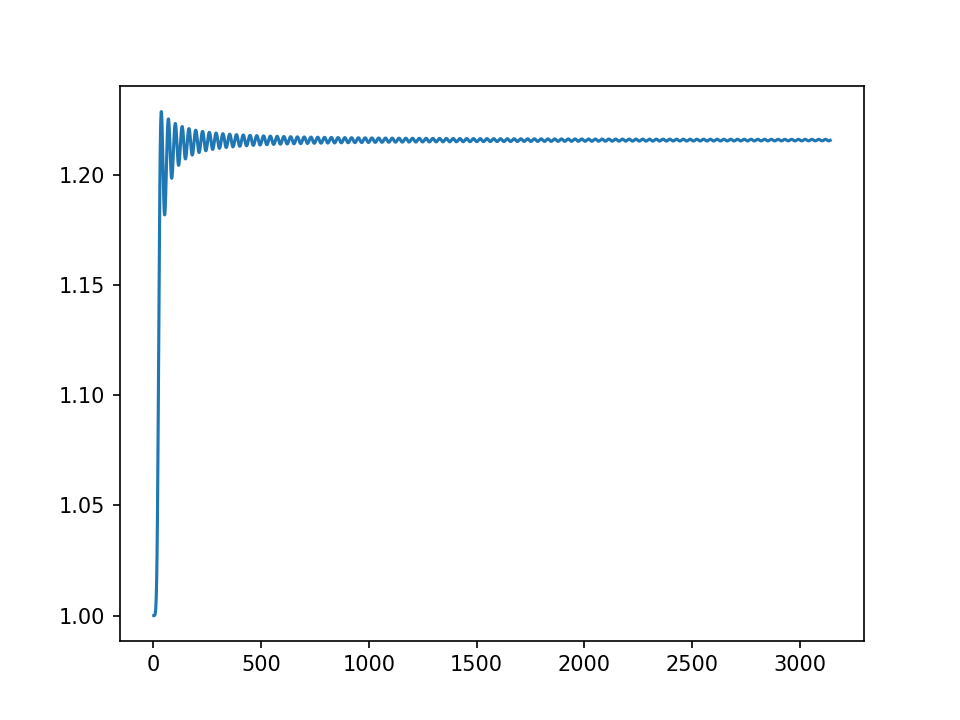

In [8]:
fig, ax = plt.subplots()
ax.plot(range(2, len(xs)), norm_ll)

In [10]:
avgs = []
for i in range(2, (len(xs))):
    avgs.append(np.mean(ys[:i]))

<IPython.core.display.Javascript object>


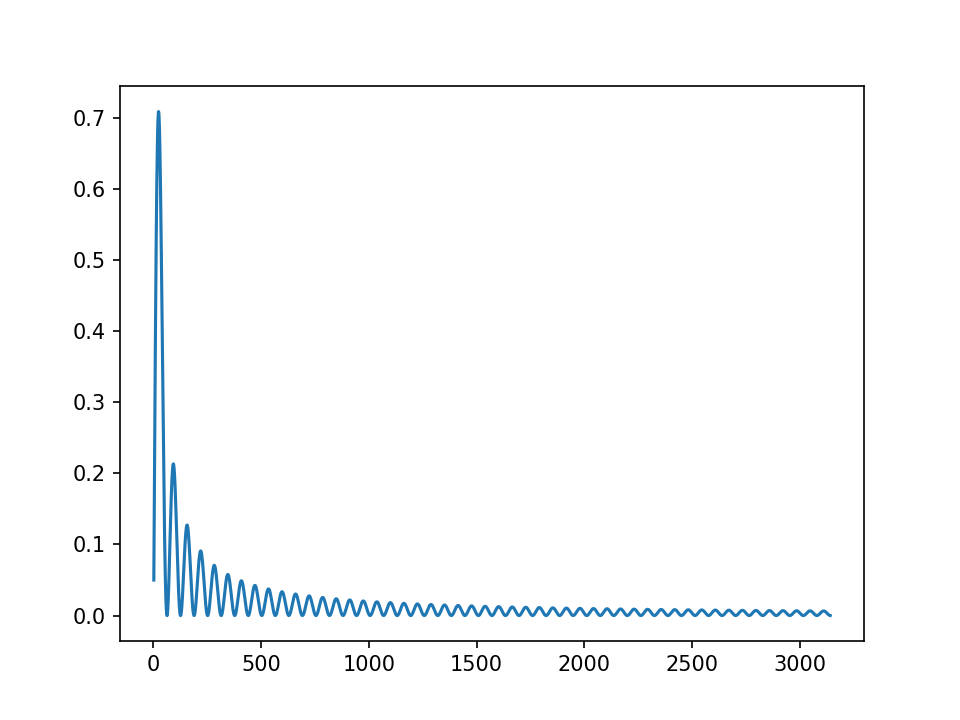

In [11]:
fig, ax = plt.subplots()
ax.plot(range(2, len(xs)), avgs)

In [9]:
def load_snl():
    filename = os.path.expanduser('~/data_sets/snl_raw_data/1429_1405/raw_1405_weather_for_1429.csv')
    cols = ['Global_Wm2', 'Date-Time']
    data = pd.read_csv(filename, parse_dates=['Date-Time'], usecols=cols, index_col=['Date-Time'])
    data.index = data.index.tz_localize('Etc/GMT+7')
    data = data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1min')).fillna(0)
    data = pd.Series(data['Global_Wm2'], index=data.index)
    data[data < 50] = 0 
    return data

snl_data = load_snl()

def make_pvlib_sys(tilt, elevation, azimuth, lat, lon):
    sys_no_loc = pvlib.pvsystem.PVSystem(surface_tilt=tilt, surface_azimuth=azimuth)
    sys_loc = pvlib.location.Location(lat, lon, altitude=elevation)
    sys = pvlib.pvsystem.LocalizedPVSystem(pvsystem=sys_no_loc, location=sys_loc)
    return sys

snl_params = {'tilt': 35, 'elevation': 1658, 'azimuth': 180, 
              'lat': 35.0549, 'lon': -106.5433}

rtc = make_pvlib_sys(**snl_params)

In [10]:
sample = snl_data[(snl_data.index >= '2016-07-01') & (snl_data.index < '2016-07-02')]

<IPython.core.display.Javascript object>


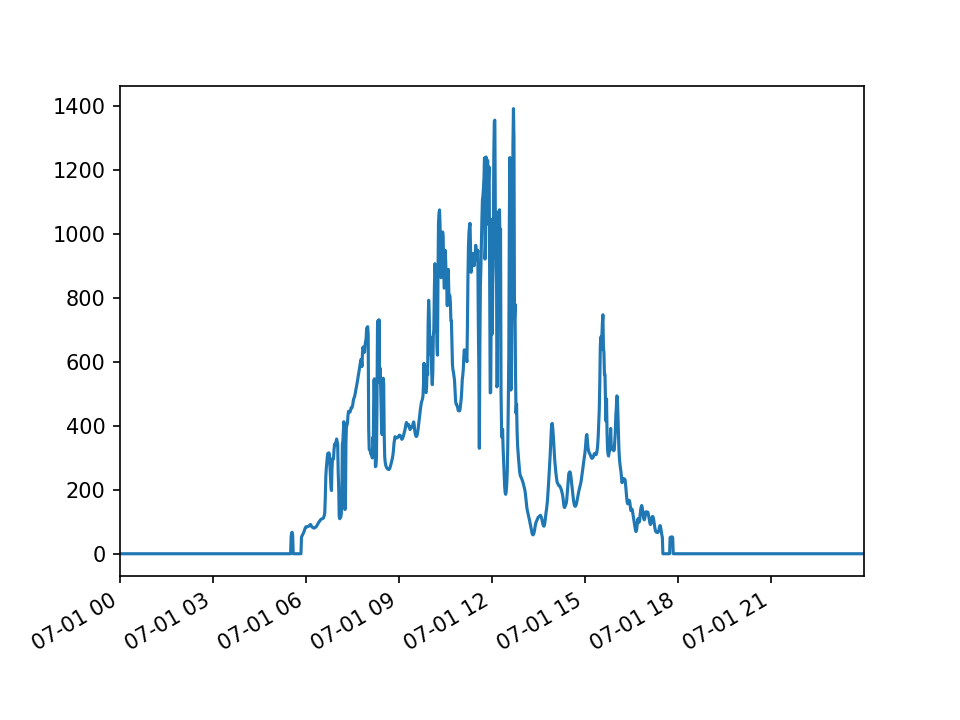

In [11]:
fig, ax = plt.subplots()

sample.plot(ax=ax)